In [2]:
import pandas as pd

df=pd.read_csv('/content/Grammar Correction.csv', sep=',')

print(f'Data shape = {df.shape}')

df.head()

Data shape = (2018, 4)


,Serial Number,Error Type,Ungrammatical Statement,Standard English
0,1,Verb Tense Errors,I goes to the store everyday.,I go to the store everyday.
1,2,Verb Tense Errors,They was playing soccer last night.,They were playing soccer last night.
2,3,Verb Tense Errors,She have completed her homework.,She has completed her homework.
3,4,Verb Tense Errors,He don't know the answer.,He doesn't know the answer.
4,5,Verb Tense Errors,The sun rise in the east.,The sun rises in the east.


In [ ]:
# summary of the dataset
summary = df.describe(include='all')
summary

,Serial Number,Error Type,Ungrammatical Statement,Standard English
count,2018.000000,2018,2018,2018
unique,NaN,36,2016,2009
top,NaN,Sentence Structure Errors,The plants needs to be watered every day.,The Earth revolves around the Sun.
freq,NaN,103,2,2
mean,1009.500000,NaN,NaN,NaN
std,582.690741,NaN,NaN,NaN
min,1.000000,NaN,NaN,NaN
25%,505.250000,NaN,NaN,NaN
50%,1009.500000,NaN,NaN,NaN
75%,1513.750000,NaN,NaN,NaN


In [ ]:
#finding null values of the dataset

missing_values = df.isnull().sum()
missing_values

NameError: name 'df' is not defined

In [ ]:
#cleaning the dataset

In [ ]:
#removing duplicates
df_new = df.drop_duplicates()
print(f"old dataset's shape= {df.shape}")
print(f"new dataset's shape= {df_new.shape}")

old dataset's shape= (2018, 4)
new dataset's shape= (2018, 4)


In [ ]:
#Standardize the text format

In [ ]:
df.head()

,Serial Number,Error Type,Ungrammatical Statement,Standard English
0,1,Verb Tense Errors,I goes to the store everyday.,I go to the store everyday.
1,2,Verb Tense Errors,They was playing soccer last night.,They were playing soccer last night.
2,3,Verb Tense Errors,She have completed her homework.,She has completed her homework.
3,4,Verb Tense Errors,He don't know the answer.,He doesn't know the answer.
4,5,Verb Tense Errors,The sun rise in the east.,The sun rises in the east.


In [ ]:
# removing leading spaces

df_new['Ungrammatical Statement'] = df_new['Ungrammatical Statement'].str.strip()
df_new['Standard English'] = df_new['Standard English'].str.strip()

In [ ]:
# striping unwanted characters like numbers at the start
df_new['Ungrammatical Statement'] = df_new['Ungrammatical Statement'].str.replace(r'^\d+\.\s', '', regex=True)
df_new['Standard English'] = df_new['Standard English'].str.replace('^\d+\.\s+', '', regex=True)

In [ ]:
print(f"new dataset's shape= {df_new.shape}")

new dataset's shape= (2018, 4)


In [ ]:
# number of each type of grammatical error

error_counts = df_new['Error Type'].value_counts()
error_counts

,count
Error Type,
Sentence Structure Errors,103
Verb Tense Errors,100
Subject-Verb Agreement,100
Article Usage,100
Spelling Mistakes,100
Preposition Usage,95
Punctuation Errors,60
Relative Clause Errors,51
Gerund and Participle Errors,50


In [ ]:
#analyzing the length of sentences in 'Ungrammatical Statement' and 'Standard English'
df_new['Ungrammatical Statement Length'] = df_new['Ungrammatical Statement'].apply(len)
df_new['Standard English Length'] = df_new['Standard English'].apply(len)

In [ ]:
df_new.head()

,Serial Number,Error Type,Ungrammatical Statement,Standard English,Ungrammatical Statement Length,Standard English Length
0,1,Verb Tense Errors,I goes to the store everyday.,I go to the store everyday.,29,27
1,2,Verb Tense Errors,They was playing soccer last night.,They were playing soccer last night.,35,36
2,3,Verb Tense Errors,She have completed her homework.,She has completed her homework.,32,31
3,4,Verb Tense Errors,He don't know the answer.,He doesn't know the answer.,25,27
4,5,Verb Tense Errors,The sun rise in the east.,The sun rises in the east.,25,26


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

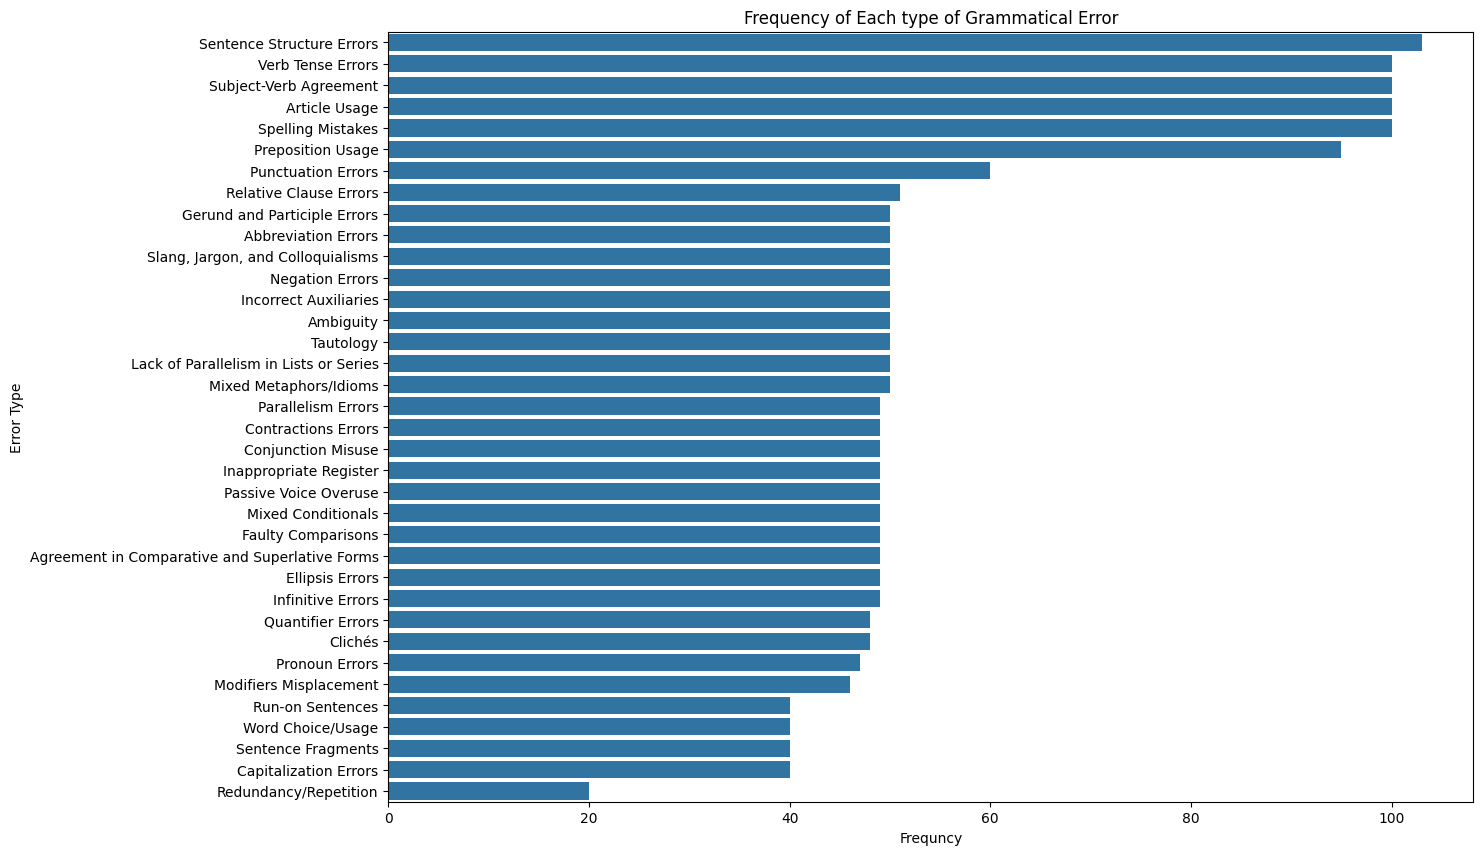

In [ ]:
# visualizing the distributions of error types
plt.figure(figsize=(14,10))
error_type_plot = sns.countplot(y=df_new['Error Type'], order=df_new['Error Type'].value_counts().index)
error_type_plot.set_title('Frequency of Each type of Grammatical Error')
error_type_plot.set_xlabel('Frequncy')
error_type_plot.set_ylabel('Error Type')

sns.set_style("dark")

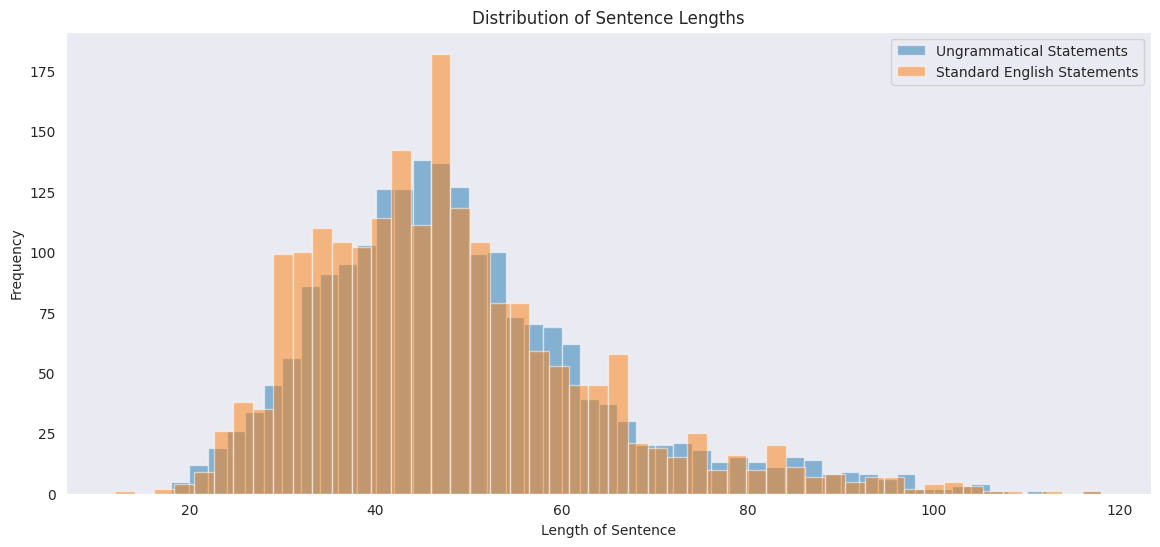

In [ ]:
# visualization of the sentence lenght in both columns
plt.figure(figsize=(14,6))
plt.hist(df_new['Ungrammatical Statement Length'], bins=50, alpha=0.5, label='Ungrammatical Statements')
plt.hist(df_new['Standard English Length'], bins=50, alpha=0.5, label='Standard English Statements')
plt.title('Distribution of Sentence Lengths')
plt.xlabel('Length of Sentence')
plt.ylabel('Frequency')
plt.legend()

plt.show()

In [ ]:
#### word frequncey analysis ####

In [ ]:
!pip install nltk
from collections import Counter
import nltk
from nltk.tokenize import word_tokenize
nltk.download('punkt_tab')

#functions to calculate word frequency
def word_frequency(sentences):
  words = []
  for sentence in sentences:
    words.extend(word_tokenize(sentence.lower()))
  return Counter(words)

#calculating word frequency for botth ungrammatical and corrected statments
ungrammatical_freq = word_frequency(df_new['Ungrammatical Statement'])
corrected_freq = word_frequency(df_new['Standard English'])

#getting the top 20 most frequent words in each category
top_ungrammatical = ungrammatical_freq.most_common(20)
top_corrected = corrected_freq.most_common(20)

print(top_ungrammatical)
print(top_corrected)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


LookupError: 
**********************************************************************
  Resource [93mpunkt_tab[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('punkt_tab')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mtokenizers/punkt_tab/english/[0m

  Searched in:
    - '/root/nltk_data'
    - '/usr/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/local/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/local/lib/nltk_data'
**********************************************************************


In [ ]:
top_ungrammatical_df = pd.DataFrame(top_ungrammatical, columns=['Word', 'Frequency'])
top_corrected_df = pd.DataFrame(top_corrected, columns=['Word', 'Frequency'])

print(top_ungrammatical_df.head())
print(top_corrected_df.head())

#bar plot
plt.figure(figsize=(15,6))

#ungrammatical Statements
plt.subplot(1, 2, 1)
sns.barplot(x='Frequency', y='Word', data=top_ungrammatical_df)
plt.title('Top Words in Ungrammatical Statements')

#corrected statements
plt.subplot(1, 2, 2)
sns.barplot(x='Frequency', y='Word', data=top_corrected_df)
plt.title('Top Words in Corrected Statements')

plt.tight_layout()
plt.show()

NameError: name 'top_ungrammatical' is not defined

In [ ]:
# part of speech

In [ ]:
from nltk import pos_tag

nltk.download('averaged_perceptron_tagger_eng')

def pos_tag_sentences(sentences):
    tagged_sentences = []
    for sentence in sentences:
        tokens = word_tokenize(sentence)
        tagged = pos_tag(tokens)
        tagged_sentences.extend(tagged)
    return tagged_sentences

tagged_ungrammatical = pos_tag_sentences(df_new['Ungrammatical Statement'])
tagged_corrected = pos_tag_sentences(df_new['Standard English'])

#counting the frequecny of each POS tag
ungrammatical_pos_counts = pd.Series([tag for _, tag in tagged_ungrammatical]). value_counts()
corrected_pos_counts = pd.Series([tag for _, tag in tagged_corrected]).value_counts()

print(ungrammatical_pos_counts)
print(corrected_pos_counts)

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


LookupError: 
**********************************************************************
  Resource [93mpunkt_tab[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('punkt_tab')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mtokenizers/punkt_tab/english/[0m

  Searched in:
    - '/root/nltk_data'
    - '/usr/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/local/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/local/lib/nltk_data'
**********************************************************************


In [ ]:
# analyzing pos tags

In [ ]:
#converting dataframe for visualization

pos_df = pd.DataFrame({
    'Ungrammatical': ungrammatical_pos_counts,
    'Corrected': corrected_pos_counts
}).fillna(0)

print(pos_df)
#plot
plt.figure(figsize=(20,14))
pos_df.plot(kind='bar', color=['red', 'blue'])
plt.xlabel('POS Tags')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.legend(title='Sentence Type')
plt.tight_layout()
plt.show()

NameError: name 'ungrammatical_pos_counts' is not defined

In [ ]:
pip install textstat

In [ ]:
import textstat

#compute the readability scores for ungrammatical sentences
ungrammatical_readability = [textstat.flesch_reading_ease(sentence) for sentence in df_new['Ungrammatical Statement']]

#compute the readability scores for corrected sentences
corrected_readability = [textstat.flesch_reading_ease(sentence) for sentence in df_new['Standard English']]

avg_ungrammatical_score = sum(ungrammatical_readability) / len(ungrammatical_readability)
avg_corrected_score = sum(corrected_readability) / len(corrected_readability)

print(f'Average Incorrect Readability = {avg_ungrammatical_score}')
print(f'Average Corect Readability = {avg_corrected_score}')

Average Incorrect Readability = 82.42183845391477
Average Corect Readability = 80.11340931615477


In [ ]:
pip install python-Levenshtein

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 40.2 MB/s eta 0:00:00


In [ ]:
import numpy as np
from Levenshtein import distance as levenshtein_distance

#assuming 'ungrammatical_sentences' and 'corrected_sentences' are lists of sentences
difficulty_index = []

for ungrammatical, corrected in zip(df_new['Ungrammatical Statement'], df_new['Standard English']):
  edit_distance = levenshtein_distance(ungrammatical, corrected)
  normalized_difficulty = edit_distance / max(len(ungrammatical), len(corrected))
  difficulty_index.append(normalized_difficulty)

difficulty_index = np.array(difficulty_index)

difficulty_levels = ['Easy' if x < 0.2 else 'Medium' if x < 0.5 else 'Hard' for x in difficulty_index]

difficulty_counts = Counter(difficulty_levels)

difficulty_counts

Counter({'Easy': 1546, 'Medium': 371, 'Hard': 101})

In [ ]:
## N-gram Analysis

In [ ]:
from nltk import bigrams, trigrams
from collections import Counter

tokens = [nltk.word_tokenize(sentence.lower()) for sentence in df_new['Ungrammatical Statement']]

#bi-grams and tri-grams
bi_grams = [gram for sentence in tokens for gram in bigrams(sentence)]
tri_grams = [gram for sentence in tokens for gram in trigrams(sentence)]

#counting
bi_grams_freq = Counter(bi_grams)
tri_grams_freq = Counter(tri_grams)

#most common bi-grams and tri-grams
most_common_bi = bi_grams_freq.most_common(10)
most_common_tri = tri_grams_freq.most_common(10)

most_common_bi, most_common_tri

LookupError: 
**********************************************************************
  Resource [93mpunkt_tab[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('punkt_tab')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mtokenizers/punkt_tab/english/[0m

  Searched in:
    - '/root/nltk_data'
    - '/usr/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/local/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/local/lib/nltk_data'
**********************************************************************


In [ ]:
bi_grams, bi_freq = zip(*most_common_bi)
tri_grams, tri_freq = zip(*most_common_tri)

#converting n gram tuples to strings
bi_grams_str = [' '.join(gram) for gram in bi_grams]
tri_grams_str = [' '.join(gram) for gram in tri_grams]

plt.figure(figsize=(15,10))

plt.subplot(1, 2, 1)
plt.barh(bi_grams_str, bi_freq, color='red')
plt.xlabel('Frequency')
plt.title('Top 10 Bi-grams in Incorrect Sentences')

plt.subplot(1, 2, 2)
plt.barh(tri_grams_str, tri_freq, color='blue')
plt.xlabel('Frequency')
plt.title('Top 10 tri-grams in Correct Sentences')

plt.tight_layout()
plt.show()

In [ ]:
!pip install textblob
from textblob import TextBlob
ungrammatical_sentiments = [TextBlob(sentence).sentiment.polarity for sentence in df_new['Ungrammatical Statement']]
corrected_sentiments = [TextBlob(sentence).sentiment.polarity for sentence in df_new['Standard English']]

#calculating average sentiment, compare individual sentence sentiment
avg_ug_sentiment = sum(ungrammatical_sentiments) / len(ungrammatical_sentiments)
avg_corr_sentiment = sum(corrected_sentiments) / len(corrected_sentiments)

print(f'Average Sentiment for Incorrect Sentences:{avg_ug_sentiment}')
print(f'Average Sentiment for Correct Senetences:{avg_corr_sentiment}')


In [ ]:
# sentiment scores
scores = [avg_ug_sentiment, avg_corr_sentiment]
labels = ['Incorrect Sentences', 'Correct Setences']

plt.figure(figsize=(8, 6))
plt.bar(labels, scores, color=['red', 'blue'])
plt.ylabel('Average Sentiment Score')
plt.title('Comparison of Average Sentiment Scores')
plt.ylim(0, 0.2)
plt.show()

In [ ]:
###Correction Pattern Mining

In [ ]:
from nltk import word_tokenize

nltk.download('punkt')

def align_and_find_changes(sentence1, sentence2):
  tokens1 = word_tokenize(sentence1)
  tokens2 = word_tokenize(sentence2)
  max_len = max(len(tokens1), len(tokens2))
  aligned_tokens1 = tokens1 + [''] * (max_len - len(tokens1))
  aligned_tokens2 = tokens2 + [''] * (max_len - len(tokens2))

  changes = []
  for token1, token2 in zip(aligned_tokens1, aligned_tokens2):
    if token1 != token2:
      changes.append((token1, token2))
  return changes

#apply the function to each pair of sentences
df_new['Changes'] = df_new.apply(lambda row: align_and_find_changes(row['Ungrammatical Statement'], row['Standard English']), axis=1)
df_new.head()

In [ ]:
from collections import Counter

# Flatten the list of changes and count the occurrences
all_changes = [change for changes in df_new['Changes'] for change in changes]
change_counter = Counter(all_changes)

# Display the most common changes
most_common_changes = change_counter.most_common(20)
print("Most Common Changes:")
for change, frequency in most_common_changes:
    print(f"{change}: {frequency}")

In [ ]:
changes, frequencies = zip(*most_common_changes)

#convert change tuples to string format for labeling
change_labels = [f'{original} -> {corrected}' for original, corrected in changes]

plt.figure(figsize=(15,8))
plt.barh(change_labels, frequencies)
plt.xlabel('Frequency')
plt.title('Most Common Grammatical Correction')
plt.gca().invert_yaxis()
plt.show()


In [ ]:
def categorize_change(change):
  original, corrected = change
  if original == '':
    return 'Insertion'
  elif corrected == '':
    return 'Deletion'
  else:
    return 'Substitution'

df_new['Change Types'] = df_new['Changes'].apply(lambda chnages: [categorize_change(change) for change in changes])
df_new.head()

In [ ]:
from collections import Counter

change_type_counter = Counter([change_type for change_types in df_new['Change Types'] for change_type in change_types])

change_types, frequencies = zip(*change_type_counter.items())

plt.figure(figsize=(10, 6))
plt.bar(change_types, frequencies, color='blue')
plt.xlabel('Change Type')
plt.ylabel('Frequency')
plt.title('Frequency of Different Types of Grammatical Changes')
plt.show()

# contexual Analysis

In [ ]:
context_window = 2

def extract_context(sentence, index, window):
  words = nltk.word_tokenize(sentence)
  start = max(0, index - window)
  end = min(len(words), index + window + 1)
  return ' '.join(words[start:end])

df_new['Contexts'] = df_new.apply(lambda row: [extract_context(row['Ungrammatical Statement'], i, context_window) for i, _ in enumerate(nltk.word_tokenize(row['Ungrammatical Statement'])) if (row['Ungrammatical Statement'][i], row['Standard English'][i]) in row['Changes']], axis=1)
df_new.head()

In [ ]:
!pip install wordcloud
from wordcloud import WordCloud

#flatten the list of contexts
all_contexts = [context for contexts in df_new['Contexts'] for context in contexts]

#join all context into a single string
all_contexts_string = ' '.join(all_contexts)

wordcloud = WordCloud(width = 1000, height = 600, background_color ='white', min_font_size = 10).generate(all_contexts_string)

plt.figure(figsize=(8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()

In [ ]:

text_df = pd.read_csv("/content/Grammar Correction.csv", sep=",")


In [ ]:
text_df.head(10)

In [ ]:
#displaying the shape of the dataset to understand the number of rows and columns in the dataset
sns.set_style("whitegrid")
plt.figure(figsize = (10, 7))
error_type_plot = sns.countplot(y = text_df["Error Type"], order = text_df["Error Type"].value_counts().index)
error_type_plot.set_title("Frequency of Each Type of Grammatical Error")
error_type_plot.set_xlabel("Frequency")
error_type_plot.set_ylabel('Error Type')

In [ ]:
#adding the length of the ungrammatical and standard English statements to the dataset
text_df["Ungrammatical Length"] = text_df["Ungrammatical Statement"].apply(len)
text_df["Standard Length"] = text_df['Standard English'].apply(len)

#displaying the distribution of sentence lengths for the lengths for the ungrammatical and standard English statements
plt.figure(figsize = (12, 4))
plt.hist(text_df['Ungrammatical Length'], bins = 50, alpha = 0.5, label= "Ungrammatical Statements")
plt.hist(text_df["Standard Length"], bins = 50, alpha = 0.5, label = "Standard English Statements")
plt.title("Distribution of Sentence Lengths")
plt.xlabel("Length of Sentence")
plt.ylabel("Frequency")
plt.legend()
plt.show()

**Rule Based Approach**

In [3]:
!pip install spacy
!python -m spacy download en_core_web_sm
from spacy.matcher import Matcher

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 110.9 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [4]:
import spacy
import pandas as pd
nlp = spacy.load("en_core_web_sm")

In [5]:
# Create Matcher
matcher = Matcher(nlp.vocab)

In [6]:
# Define error patterns for correction
patterns = [
    # Preposition Errors (e.g., "interested at" -> "interested in")
    [{"LOWER": "at"}], "in",  # Replace "at" with "in"

    # Subject-Verb Agreement Errors (e.g., "He dont like it" -> "He doesn't like it")
    [{"POS": "NOUN", "TAG": "NN"}, {"POS": "VERB", "TAG": "VBP", "LEMMA": {"NOT_IN": ["be", "have"]}}], "doesn't",  # noun + verb in base form

    # Pronoun Errors (e.g., "Me went to the store" -> "I went to the store")
    [{"LOWER": "me"}], "I",  # Replace 'me' with 'I' when used in subject position

    # Spelling Errors (e.g., "dont" -> "don't")
    [{"LOWER": "dont"}], "don't",  # Simple typo correction

    # N-gram Errors (e.g., "could of" -> "could have")
    [{"LOWER": "could"}, {"LOWER": "of"}], "could have",  # Correction for "could of"

    # Verb tense correction (e.g., correcting past tense to present continuous)
    [{"POS": "VERB", "TAG": "VBD"}], "is",  # Simplified tense fix (could be refined based on context)

    # Handle common article usage errors (e.g., adding missing article 'a' or 'an')
    [{"POS": "DET", "TAG": "DT"}], "a",  # Handle article misuse and add missing article

    # Example for handling "could" vs. "could have"
    [{"LOWER": "could"}, {"LOWER": "of"}], "could have",  # Fix for "could of"
]

In [7]:
# Function to apply all patterns
def correct_errors(doc):
    corrected_tokens = list(doc)  # Create a mutable list of tokens
    for i in range(0, len(patterns), 2):  # Process every two elements (pattern and correction)
        pattern = patterns[i]
        correction = patterns[i + 1]

        matcher.add("error_rule", [pattern])  # Add the pattern to the matcher
        matches = matcher(doc)  # Find the matches for the pattern
        for match_id, start, end in matches:
            span = doc[start:end]
            # Replace the matched span with the correction
            corrected_tokens[start:end] = [nlp(correction)[0]] * len(span)

    # Reconstruct corrected sentence
    corrected_text = " ".join([token.text for token in corrected_tokens])
    return corrected_text

In [8]:
# Create a sample dataset with 'incorrect' sentences
data = {
    'incorrect': [
        "The dog wagged its tail",
        "He dont like it",
        "Their going to the park",
        "I could of done better",
        "Me went to the store",
        "She interested at learning"
    ]
}

df = pd.DataFrame(data)

# Apply the error correction function to the 'incorrect' column
df['corrected'] = df['incorrect'].apply(lambda x: correct_errors(nlp(x)))

# Display the results
print(df[['incorrect', 'corrected']])

                    incorrect                      corrected
0     The dog wagged its tail       could dog could its tail
1             He dont like it               He do nt like it
2     Their going to the park      Their going to could park
3      I could of done better      I could could done better
4        Me went to the store     could could to could store
5  She interested at learning  She interested could learning


In [9]:
df = pd.read_csv('/content/Grammar Correction.csv')  # Your dataset path

In [10]:
# Apply the error correction function to the 'incorrect' column
df['Ungrammatical Statement'] = df['Ungrammatical Statement'].apply(lambda x: correct_errors(nlp(x)))

# Display the results
print(df[['Ungrammatical Statement', 'Standard English']])

                                Ungrammatical Statement  \
0                      I goes to could store everyday .   
1                  They was playing soccer last night .   
2                     She have completed her homework .   
3                         He do n't know could answer .   
4                        could sun rise in could east .   
...                                                 ...   
2013  could festival celebrates music , culture , an...   
2014  could seminar will address topics such as care...   
2015  could research examines could effects of clima...   
2016  could report highlights could need for investm...   
2017  could program encourages students to think cre...   

                                       Standard English  
0                           I go to the store everyday.  
1                  They were playing soccer last night.  
2                       She has completed her homework.  
3                           He doesn't know the answer.  
4

# **GRAMMAR CORRECTION WITH DIFFERENT MODELS**




In [11]:
import pandas as pd
from tqdm import tqdm
import numpy as np

In [12]:
!pip install optuna
import torch
import optuna
from torch.optim.lr_scheduler import StepLR
from torch.utils.data import Dataset, DataLoader
from nltk.translate.bleu_score import sentence_bleu
from sklearn.model_selection import train_test_split
from nltk.translate.bleu_score import SmoothingFunction
from transformers import T5Tokenizer, T5ForConditionalGeneration, AutoTokenizer, AutoModelForSeq2SeqLM

#setting the device to cuda if available else cpu
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

df = pd.read_csv("/content/Grammar Correction.csv", sep=",")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 364.4/364.4 kB 24.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.5/233.5 kB 20.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 6.5 MB/s eta 0:00:00


In [13]:
print(df.shape)
df.head(5)

(2018, 4)


,Serial Number,Error Type,Ungrammatical Statement,Standard English
0,1,Verb Tense Errors,I goes to the store everyday.,I go to the store everyday.
1,2,Verb Tense Errors,They was playing soccer last night.,They were playing soccer last night.
2,3,Verb Tense Errors,She have completed her homework.,She has completed her homework.
3,4,Verb Tense Errors,He don't know the answer.,He doesn't know the answer.
4,5,Verb Tense Errors,The sun rise in the east.,The sun rises in the east.


In [14]:
class GrammarCorrectionDataset(Dataset):
    def __init__(self, dataframe):
        self.dataframe = dataframe

    def __len__(self):
        return len(self.dataframe)

    def __getitem__(self, idx):
        ungrammatical_statement = self.dataframe.iloc[idx]["Ungrammatical Statement"]
        standard_english = self.dataframe.iloc[idx]["Standard English"]
        return ungrammatical_statement, standard_english

In [15]:
train_df, test_df = train_test_split(df, test_size = 0.2)
train_df, val_df = train_test_split(train_df, test_size = 0.1)

train_dataset = GrammarCorrectionDataset(train_df)
val_dataset = GrammarCorrectionDataset(val_df)
test_dataset = GrammarCorrectionDataset(test_df)

In [16]:
!pip install evaluate
import evaluate

train_dataloader = DataLoader(train_dataset, batch_size=4, shuffle=True)
val_dataloader = DataLoader(val_dataset, batch_size=4, shuffle=False)
test_dataloader = DataLoader(test_dataset, batch_size=4, shuffle=False)
dataloaders = (train_dataloader, val_dataloader, test_dataloader)

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.0/84.0 kB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 23.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 16.5 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2024.10.0
    Uninstalling fsspec-2024.10.0:
      Successfully uninstalled fsspec-2024.10.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2024.10.0 requires fsspec==2024.10.0, but you have fsspec 2024.9.0 which is incompatible.


In [17]:
import torch
from transformers import AdamW
import evaluate

# Load BLEU metric
bleu = evaluate.load("bleu")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


In [18]:
def train_model(model,tokenizer,dataloaders,num_epochs):

  def evaluate_model(model, dataloader):
      model.eval()
      predictions = []
      references = []
      exact_matches = 0
      total_examples = 0

      for batch in dataloader:
          ungrammatical_statement, standard_english = batch
          ungrammatical_statement = list(ungrammatical_statement)

          inputs = tokenizer(ungrammatical_statement, return_tensors="pt", padding=True, truncation=True, max_length=256)

          with torch.no_grad():
              outputs = model.generate(**inputs, max_new_tokens=256)

          for idx, output in enumerate(outputs):
              corrected_sentence = tokenizer.decode(output, skip_special_tokens=True)
              predictions.append(corrected_sentence)
              reference_sentence = standard_english[idx]

              references.append(reference_sentence)

              if corrected_sentence == reference_sentence:
                  exact_matches += 1
              total_examples += 1

      bleu_score = bleu.compute(predictions=predictions, references=[[ref] for ref in references])['bleu']

      accuracy = exact_matches / total_examples

      return bleu_score

  train_dataloader, val_dataloader, test_dataloader = dataloaders

  optimizer = AdamW(model.parameters(), lr=1e-3)


  num_epochs = num_epochs
  for epoch in range(num_epochs):
      print(f"\nEpoch {epoch + 1}/{num_epochs}")

      model.train()

      for batch in train_dataloader:
          ungrammatical_statement, standard_english = batch

          inputs = tokenizer(list(ungrammatical_statement), return_tensors="pt", padding=True, truncation=True, max_length=256)
          labels = tokenizer(list(standard_english), return_tensors="pt", padding=True, truncation=True, max_length=256).input_ids

          outputs = model(input_ids=inputs.input_ids, attention_mask=inputs.attention_mask, labels=labels)
          loss = outputs.loss

          optimizer.zero_grad()
          loss.backward()
          optimizer.step()

      print(f"Training Loss: {loss.item()}")

      train_bleu_score = evaluate_model(model, train_dataloader)
      print(f"Training BLEU Score: {train_bleu_score}")

      val_bleu_score = evaluate_model(model, val_dataloader)
      print(f"Validation BLEU Score: {val_bleu_score}")

      test_bleu_score = evaluate_model(model, test_dataloader)
      print(f"Test BLEU Score: {test_bleu_score}")

  return val_bleu_score, test_bleu_score

In [19]:
import matplotlib.pyplot as plt


bleu_scores = {
    'Model Name': [],
    'Validation BLEU': [],
    'Test BLEU': [],
    'Model Path': []
}


model_configs = [
    ("google-t5/t5-small", "t5-small", "t5_small_model"),
    ("vennify/t5-base-grammar-correction", "t5-base", "t5_gec_model"),
    ("Unbabel/gec-t5_small", "t5-small", "unbabel_gec_model"),
    ("Rosi-si/my_awesome_gec", "t5-small", "rosisi_gec_model"),
    ("prithivida/grammar_error_correcter_v1", "t5-small", "pv_gec_model"),
    # ("facebook/m2m100_418M", "facebook/m2m100_418M", "facebookm2m100"), # The tokenizer name should be 'facebook/m2m100_418M'
    # ("ybelkada/tiny-random-T5ForConditionalGeneration-calibrated","ybelkada/tiny-random-T5ForConditionalGeneration-calibrated","ybelkada"),
    # ("aglazkova/bart_finetuned_keyphrase_extraction","aglazkova/bart_finetuned_keyphrase_extraction","aglazkova")
]

In [ ]:
for model_name, tokenizer_name, save_path in model_configs:
    if model_name in ["facebook/m2m100_418M", "ybelkada/tiny-random-T5ForConditionalGeneration-calibrated", "aglazkova/bart_finetuned_keyphrase_extraction"]:
        tokenizer = AutoTokenizer.from_pretrained(tokenizer_name)
        model = AutoModelForSeq2SeqLM.from_pretrained(model_name)
    else:
        tokenizer = T5Tokenizer.from_pretrained(tokenizer_name)
        model = T5ForConditionalGeneration.from_pretrained(model_name)
    val_bleu, test_bleu = train_model(model, tokenizer, dataloaders, num_epochs=1)

    bleu_scores['Model Name'].append(model_name)
    bleu_scores['Validation BLEU'].append(val_bleu)
    bleu_scores['Test BLEU'].append(test_bleu)
    bleu_scores['Model Path'].append(save_path)

    model.save_pretrained(save_path)
    tokenizer.save_pretrained(save_path)
    print(f"Model saved to {save_path}")

tokenizer_config.json:   0%|          | 0.00/2.32k [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.39M [00:00<?, ?B/s]

You are using the default legacy behaviour of the <class 'transformers.models.t5.tokenization_t5.T5Tokenizer'>. This is expected, and simply means that the `legacy` (previous) behavior will be used so nothing changes for you. If you want to use the new behaviour, set `legacy=False`. This should only be set if you understand what it means, and thoroughly read the reason why this was added as explained in https://github.com/huggingface/transformers/pull/24565


config.json:   0%|          | 0.00/1.21k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/242M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/147 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:591: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(



Epoch 1/1


Passing a tuple of `past_key_values` is deprecated and will be removed in Transformers v4.48.0. You should pass an instance of `EncoderDecoderCache` instead, e.g. `past_key_values=EncoderDecoderCache.from_legacy_cache(past_key_values)`.


Training Loss: 0.16694855690002441
Training BLEU Score: 0.837580021680738


In [ ]:
best_test_index = bleu_scores['Test BLEU'].index(max(bleu_scores['Test BLEU']))
best_test_model_path = bleu_scores['Model Path'][best_test_index]

print(f"Best model path with highest test BLEU score: {best_test_model_path}")

In [ ]:
plt.figure(figsize=(10, 5))
plt.bar(bleu_scores['Model Name'], bleu_scores['Validation BLEU'], color='skyblue')
plt.xlabel("Model")
plt.ylabel("Validation BLEU Score")
plt.title("Validation BLEU Scores for Different Models")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 5))
plt.bar(bleu_scores['Model Name'], bleu_scores['Test BLEU'], color='lightgreen')
plt.xlabel("Model")
plt.ylabel("Test BLEU Score")
plt.title("Test BLEU Scores for Different Models")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
max_test_bleu_idx = bleu_scores['Test BLEU'].index(max(bleu_scores['Test BLEU']))

best_model_name = bleu_scores['Model Name'][max_test_bleu_idx]

print(f"The best performing model {best_model_name} and its score it has got is {max_test_bleu_idx}")

In [ ]:
model = AutoModelForSeq2SeqLM.from_pretrained(best_test_model_path)
def correct_grammar(model, ungrammatical_statement):
    model.eval()

    prompt = f"translate to English: {ungrammatical_statement}"

    inputs = tokenizer(prompt, return_tensors="pt", padding=True, truncation=True, max_length=256)
    outputs = model.generate(**inputs, max_new_tokens=256)

    corrected_english = tokenizer.decode(outputs[0], skip_special_tokens=True)
    return corrected_english

df["Corrected English"] = df["Ungrammatical Statement"].apply(lambda x: correct_grammar(model, x))

In [ ]:
df.head(30)

In [ ]:
df.tail(20)

In [ ]:
!pip install happytransformer
from happytransformer import HappyTextToText, TTSettings

In [ ]:
happy_tt = HappyTextToText("T5", "Unbabel/gec-t5_small")

def generate_text(input_text, happy_tt, beam_settings):
    """
    Generate corrected text using the T5 model and Happy Transformer.

    Args:
        input_text (str): The input text that needs grammar correction.
        happy_tt (HappyTextToText): The initialized HappyTextToText object.
        beam_settings (TTSettings): Beam search settings.

    Returns:
        str: The corrected text generated by the model.
    """
    input_text = "grammar: " + input_text
    result = happy_tt.generate_text(input_text, args=beam_settings)
    return result.text

beam_settings = TTSettings(num_beams=5, min_length=1, max_length=20)

In [ ]:
example = "he's is going not to school"
result = generate_text(example, happy_tt, beam_settings)
print(result)

In [ ]:
example_2 = "is he have a car"
result_2 = generate_text(example_2, happy_tt, beam_settings)
print(result_2)

In [ ]:
example = "do he worked at the factory"
result = generate_text(example, happy_tt, beam_settings)
print(result)

In [ ]:
example = "do he work at the factory?"
result = generate_text(example, happy_tt, beam_settings)
print(result)